# 서울특별시 공공자전거 따릉이 대여이력 분석
* [miningful/seoulbike: 따릉이 따세권EDA](https://github.com/miningful/seoulbike)에서 흥미를 얻어 분석을 시작하게 됨

## 데이터 출처 :
* 서울특별시 공공자전거 대여이력 정보
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

* `(이달의주요공개정보)_서울_공공자전거(따릉이)_이용현황 자료(161021).xlsx (1.24MB)`
https://opengov.seoul.go.kr/anspruch/10045476


## 관련자료 
* [(석간) 서울시 따릉이 회원 62만 돌파 출 퇴근시간 38% 집중](http://spp.seoul.go.kr/main/news/news_report.jsp#view/253821)
* [공공자전거 따릉이 인기 따라 '따세권' 형성…소외지역도 :: 공감언론 뉴시스통신사 ::](http://www.newsis.com/view/?id=NISX20180706_0000356247&cID=10201&pID=10200)
* [서울특별시 빅데이터 캠퍼스 > 분석결과/사례공유 > 서울시 분석사례 > 서울시 자전거 이동경로 분석](https://bigdata.seoul.go.kr/noti/selectNoti.do?r_id=P430&bbs_seq=229&sch_type=&sch_text=&currentPage=1)
* [따릉이 편리하게 이용하기 위한 14가지 | 서울시 정보소통광장(정보공개)](https://opengov.seoul.go.kr/mediahub/15085803)

In [23]:
#plotnine 설치
!pip show plotnine

Name: plotnine
Version: 0.7.1
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\programdata\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas, patsy, statsmodels, scipy, mizani, descartes
Required-by: 


In [24]:
#folium 설치
!pip show folium

Name: folium
Version: 0.11.0
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: c:\programdata\anaconda3\lib\site-packages
Requires: jinja2, branca, numpy, requests
Required-by: 


In [25]:
# 노트북이 간결해 보이도록 경고 문구는 출력되지 않도록 함
# 프로그래밍에 익숙하다면 경고 문구도 출력해서 보도록 한다. 
# 하지만 익숙하지 않다면 당황하지 않기 위해 경고 메시지는 찍히지 않도록 한다.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 사용할 도구 가져오기

In [26]:
#!pip install plotnine

In [27]:
import pandas as pd
import numpy as np
from plotnine import *


# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 불러오기
* 서울시정보소통광장에서 다운로드 받은 csv파일과 크롤링해온 대여소 정보가 있다.
* 이 노트북에서는 전체 데이터 중 일부 데이터만을 사용해서 특정 시기의 데이터만 분석해 보고 점점 더 큰 데이터를 불러와 보도록 한다.

In [28]:
%ls data

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 8E03-408B

 C:\python_ds\python_webscaping_datascience\data 디렉터리

2020-11-11  오전 09:35    <DIR>          .
2020-11-11  오전 09:35    <DIR>          ..
2020-10-16  오후 12:35    <DIR>          .ipynb_checkpoints
2020-10-30  오후 04:28           239,122 actors2.json
2020-11-11  오전 09:34           190,636 bike_rent_station.csv
2020-10-30  오전 09:35           175,883 congress.json
2020-11-09  오후 01:19           114,404 damunhwa.pdf
2020-10-14  오후 12:06            12,341 data_draw_korea.csv
2020-10-14  오후 02:41               274 dbscript.txt
2020-10-26  오전 09:48           271,010 member.json
2020-10-22  오전 09:50           265,143 songs.json
2020-10-14  오후 12:06    <DIR>          titanic
2020-10-21  오후 03:21            54,101 weater_1021.json
2020-10-14  오후 12:06               668 yesterday.txt
2020-10-16  오전 11:50             1,583 yesterday_trans.txt
2020-10-14  오후 12:06         3,241,116 zip.json
2018-12-18  오전 11:52        73,556,846 서울특별시 공공자전거 대여이력 정보_2018년_2분기

In [29]:
df = pd.read_csv('data/서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv', encoding='cp949',engine='python')
# 2018년 2분기까지의 데이터를 보고 싶다면 아래 파일을 불러온다.
# df = pd.read_csv('data/seoul-bike-2018.csv')
df.shape

(586304, 11)

## 데이터 미리보기 및 요약하기
* head와 tail을 통해 데이터 미리보기를 해볼 수 있다.
* head는 데이터의 윗부분을 tail은 데이터의 하단부를 미리보기 해준다. 
* 괄호안에 숫자를 넣어주면 해당 숫자만큼의 데이터를 가져온다. 기본값은 5이다.

In [30]:
df.head()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160
1,'SPB-16954','2018-06-16 00:00:07','272',' 당산육갑문',16,'2018-06-16 02:00:36','1827',' 독산보도육교 앞 자전거 보관소',9,120,18100
2,'SPB-09676','2018-06-16 00:00:11','1036',' 고덕동 주양쇼핑',7,'2018-06-16 00:24:05','1038',' 강일 다솜 어린이 공원',9,23,3350
3,'SPB-07143','2018-06-16 00:00:15','1726',' 삼익세라믹아파트교차로',7,'2018-06-16 00:15:31','1706',' 기업은행 앞',9,14,1480
4,'SPB-13007','2018-06-16 00:00:16','2058',' 노량진동 맥도널드앞',10,'2018-06-16 00:14:25','258',' 신길역3번출구',8,13,2920


In [31]:
df.tail()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
586299,'SPB-15985','2018-06-30 23:59:55','505',' 자양사거리 광진아크로텔 앞',9,'2018-07-01 00:09:38','593','자양중앙나들목',5,9,1230
586300,'SPB-15081','2018-06-30 23:59:55','1328',' 월곡역 3번출구',7,'2018-07-01 00:18:02','647',' 신이문역 1번출구',7,17,3600
586301,'SPB-13677','2018-06-30 23:59:57','2376',' 수서역 6번출구 앞',2,'2018-07-01 00:20:38','2387',' 래미안강남힐즈 사거리',5,20,2590
586302,'SPB-06577','2018-06-30 23:59:57','1251',' 석촌역 2번출구',2,'2018-07-01 00:57:29','1245',' 문정 법조단지9',4,57,6640
586303,'SPB-03842','2018-06-30 23:59:58','2169',' 봉천역 2번출구',6,'2018-07-01 00:08:05','2112',' 서울대입구역 마에스트로',7,7,910


* info를 사용하면 해당 데이터의 요약정보를 볼 수 있다.
* 데이터의 갯수와 데이터의 타입, 크기 등을 볼 수 있다.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   '자전거번호'    586304 non-null  object
 1   '대여일시'     586304 non-null  object
 2   '대여대여소번호'  586304 non-null  object
 3   '대여대여소명'   586304 non-null  object
 4   '대여거치대'    586304 non-null  int64 
 5   '반납일시'     586304 non-null  object
 6   '반납대여소번호'  586304 non-null  object
 7   '반납대여소명'   586304 non-null  object
 8   '반납거치대'    586304 non-null  int64 
 9   '이용시간(분)'  586304 non-null  int64 
 10  '이용거리(M)'  586304 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


In [33]:
df.describe()

,'대여거치대','반납거치대','이용시간(분)','이용거리(M)'
count,586304.000000,586304.000000,586304.000000,586304.000000
mean,6.981460,6.939248,28.922530,4712.563602
std,5.217671,5.196975,30.866556,9003.052657
min,1.000000,1.000000,2.000000,0.000000
25%,3.000000,3.000000,9.000000,1320.000000
50%,6.000000,6.000000,18.000000,2530.000000
75%,10.000000,10.000000,40.000000,5290.000000
max,40.000000,40.000000,4320.000000,255070.000000


In [34]:
df.describe(include=np.object)

,'자전거번호','대여일시','대여대여소번호','대여대여소명','반납일시','반납대여소번호','반납대여소명'
count,586304,586304,586304,586304,586304,586304,586304
unique,12970,426750,1267,1267,427833,1269,1269
top,'SPB-18238','2018-06-18 19:42:44','207',' 여의나루역 1번출구 앞','2018-06-19 19:53:32','113',' 홍대입구역 2번출구 앞'
freq,139,42,4073,4073,18,3896,3896


## 분석을 위한 전처리
* 위에서 데이터를 미리보기 했을 때 컬럼과 데이터에 불필요한 홑따옴표가 포함되어 있다.
* 전처리를 통해 제거해 준다.
* object 타입의 데이터에는 모두 홑따옴표가 들어가 있다. 따라서 object 데이터 타입이라면 홑따옴표를 제거해 주도록 한다.

In [35]:
# 컬럼에 있는 '를 제거한다.
df.columns = df.columns.str.strip("'")

In [36]:
df.head(1)

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160


In [37]:
# 불필요하게 '가 들어가 있다. 스트링 타입으로 되어있는 데이터에서 '을 제거하자.
df = df.apply(lambda x: x.str.strip("'") if x.dtype == np.dtype('object') else x)

# 다음의 방법으로 제거할 수도 있다.
# df.iloc[:, :4] = df.iloc[:, :4].apply(lambda x: x.str.strip("'"))
# df.iloc[:, 5:8] = df.iloc[:, 5:8].apply(lambda x: x.str.strip("'"))

In [38]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-11906,2018-06-16 00:00:07,932,예일여중,1,2018-06-16 00:16:41,934,신사동 성당,11,15,2160
1,SPB-16954,2018-06-16 00:00:07,272,당산육갑문,16,2018-06-16 02:00:36,1827,독산보도육교 앞 자전거 보관소,9,120,18100
2,SPB-09676,2018-06-16 00:00:11,1036,고덕동 주양쇼핑,7,2018-06-16 00:24:05,1038,강일 다솜 어린이 공원,9,23,3350
3,SPB-07143,2018-06-16 00:00:15,1726,삼익세라믹아파트교차로,7,2018-06-16 00:15:31,1706,기업은행 앞,9,14,1480
4,SPB-13007,2018-06-16 00:00:16,2058,노량진동 맥도널드앞,10,2018-06-16 00:14:25,258,신길역3번출구,8,13,2920


In [39]:
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
586299,SPB-15985,2018-06-30 23:59:55,505,자양사거리 광진아크로텔 앞,9,2018-07-01 00:09:38,593,자양중앙나들목,5,9,1230
586300,SPB-15081,2018-06-30 23:59:55,1328,월곡역 3번출구,7,2018-07-01 00:18:02,647,신이문역 1번출구,7,17,3600
586301,SPB-13677,2018-06-30 23:59:57,2376,수서역 6번출구 앞,2,2018-07-01 00:20:38,2387,래미안강남힐즈 사거리,5,20,2590
586302,SPB-06577,2018-06-30 23:59:57,1251,석촌역 2번출구,2,2018-07-01 00:57:29,1245,문정 법조단지9,4,57,6640
586303,SPB-03842,2018-06-30 23:59:58,2169,봉천역 2번출구,6,2018-07-01 00:08:05,2112,서울대입구역 마에스트로,7,7,910


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   자전거번호    586304 non-null  object
 1   대여일시     586304 non-null  object
 2   대여대여소번호  586304 non-null  object
 3   대여대여소명   586304 non-null  object
 4   대여거치대    586304 non-null  int64 
 5   반납일시     586304 non-null  object
 6   반납대여소번호  586304 non-null  object
 7   반납대여소명   586304 non-null  object
 8   반납거치대    586304 non-null  int64 
 9   이용시간(분)  586304 non-null  int64 
 10  이용거리(M)  586304 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


In [41]:
df.describe(include=np.object)

,자전거번호,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명
count,586304,586304,586304,586304,586304,586304,586304
unique,12970,426750,1267,1267,427833,1269,1269
top,SPB-18238,2018-06-18 18:56:44,207,여의나루역 1번출구 앞,2018-06-19 19:53:32,113,홍대입구역 2번출구 앞
freq,139,42,4073,4073,18,3896,3896


## 결측치 보기

In [42]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

## 결측치 시각화 하기
* missingno는 별도로 설치해야 하는 시각화 도구 입니다. 결측치를 시각화해서 볼 수 있습니다.

In [43]:
#!pip install missingno

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
C:\ProgramData\Anaconda3\lib\site-

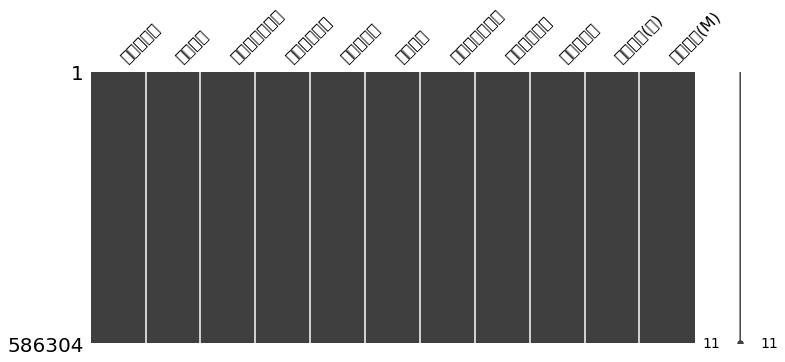

In [44]:
# 결측치 보기
import missingno as msno

msno.matrix(df, figsize=(12,5))

## 대여소별 대여|반납 현황

In [45]:
#df['대여대여소번호'].unique().shape[0]

In [46]:
# print('# 대여소 수')
# print('대여 대여소: ', df['대여대여소번호'].unique().shape[0])
# print('반납 대여소: ', df['반납대여소번호'].unique().shape[0])

In [47]:
# df['대여대여소번호'].value_counts().tail(10)

* 대여 대여소번호에 상암센터 정비실과 위트콤 같은 숫자가 아닌 곳들이 있음

In [48]:
# 대여량이 많은 상위 대여소
df['대여대여소명'].value_counts().head(10)

 여의나루역 1번출구 앞               4073
 뚝섬유원지역 1번출구 앞              3369
 홍대입구역 2번출구 앞               3174
 봉림교 교통섬                    2709
 롯데월드타워(잠실역2번출구 쪽)          2637
 고속터미널역 8-1번, 8-2번 출구 사이    2453
 마포구민체육센터 앞                 2178
 신도림역 1번 출구 앞               2022
 안암로터리 버스정류장 앞              1987
 잠실새내역 5번 출구 뒤              1841
Name: 대여대여소명, dtype: int64

In [49]:
# 반납량이 많은 상위 대여소
df['반납대여소명'].value_counts().head(10)

 홍대입구역 2번출구 앞               3896
 뚝섬유원지역 1번출구 앞              3814
 여의나루역 1번출구 앞               3730
 봉림교 교통섬                    2762
 롯데월드타워(잠실역2번출구 쪽)          2624
 고속터미널역 8-1번, 8-2번 출구 사이    2495
 마포구민체육센터 앞                 2454
 안암로터리 버스정류장 앞              2110
 신도림역 1번 출구 앞               1961
 CJ 드림시티                    1932
Name: 반납대여소명, dtype: int64

1. 대여반납이 많은 상위 대여소인 홍대입구역, 여의나루역, 뚝섬유원지, 롯데월드타워는 모두 강이나 호수를 인근에 두고 있다. 
2. 성대입구나 안암로터리 버스정류장은 대학가 인근이다.

In [50]:
df.groupby(['대여대여소명'])['이용거리(M)'].mean()

대여대여소명
  강동구청 앞          3823.703704
  둔촌역 3번 출입구      3733.403042
 (구)신한은행 중랑교지점    4562.977346
 (구)합정동 주민센터      4876.831169
 3호선 매봉역 3번출구앞    5489.920319
                     ...     
이수역 4번 출구         4728.075370
자양중앙나들목           4192.175503
중랑센터              4281.914894
청계산입구역 1번출구       2695.479705
하나은행 방배동지점 앞      6159.078341
Name: 이용거리(M), Length: 1267, dtype: float64

In [51]:
# 평균 이용거리가 긴 상위 대여소 
# df.groupby(['대여대여소명'])['이용거리(M)'].mean() 의 결과는 Series객체이지만 
# reset_index()를 하면 DataFrame이 된다.
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index()\
.sort_values(by='이용거리(M)', ascending=False).head(10)

,대여대여소명,이용거리(M)
353,동작역 5번출구 동작주차공원,10454.240000
330,독산보도육교 앞 자전거 보관소,10401.840607
810,신한은행 시흥대로금융센터지점,9857.738095
280,달맞이공원,9639.504950
1166,한내근린공원 남측,9419.090909
1197,현대자동차서비스 앞,9364.282178
419,망원초록길 입구,9160.294118
1194,현대고등학교 건너편,9047.614350
1231,흑석역 1번출구,8938.909300
1113,청계천 생태교실 앞,8923.918819


In [52]:
# 평균 이용거리가 짧은 대여소
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index()\
.sort_values(by='이용거리(M)', ascending=True).head()

,대여대여소명,이용거리(M)
1249,상암센터 정비실,256.250000
188,국군복지단,1828.244275
7,CJ오쇼핑앞,1832.727273
100,건국대학교 과학관(이과대) 앞,2143.065327
937,원남동사거리,2234.752294


In [53]:
# 평균 이용시간이 많은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index()\
.sort_values(by='이용시간(분)', ascending=False).head()

,대여대여소명,이용시간(분)
280,달맞이공원,59.782178
353,동작역 5번출구 동작주차공원,59.484000
93,개화동상사마을종점 버스정류장,55.500000
649,서울숲 남문 버스정류소 옆,55.495074
648,서울숲 관리사무소,55.492228


In [54]:
# 평균 이용시간이 적은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index()\
.sort_values(by='이용시간(분)', ascending=True).head()

,대여대여소명,이용시간(분)
7,CJ오쇼핑앞,11.416667
1249,상암센터 정비실,12.000000
188,국군복지단,12.022901
1089,참새공원(백곡경노당),12.666667
575,삼일초등학교 인근,14.460274


## 시계열 데이터 보기

In [55]:
df.dtypes

자전거번호      object
대여일시       object
대여대여소번호    object
대여대여소명     object
대여거치대       int64
반납일시       object
반납대여소번호    object
반납대여소명     object
반납거치대       int64
이용시간(분)     int64
이용거리(M)     int64
dtype: object

In [56]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [57]:
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일'],
      dtype='object')

In [58]:
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

## 일자별 대여|반납 현황
* 날짜에 따라 대여|반납 횟수를 확인한다.

In [59]:
df['대여일'].value_counts().reset_index()

,index,대여일
0,21,47319
1,22,47024
2,19,46839
3,20,46107
4,25,46105
5,16,46038
6,23,45274
7,17,43161
8,29,42313
9,27,40698


In [60]:
df['반납일'].value_counts().reset_index()

,index,반납일
0,21,47232
1,19,46878
2,22,46670
3,25,46276
4,20,46085
5,23,45695
6,16,44701
7,17,43669
8,29,41498
9,27,40450


In [61]:
df_day_1 = df['대여일'].value_counts().reset_index()
df_day_1.columns = ['day', 'count']

df_day_1 = df_day_1.sort_values('day')
df_day_1['대여반납'] = '대여'
#print(df_day_1)
print(df_day_1.shape)

df_day_2 = df['반납일'].value_counts().reset_index()
df_day_2.columns = ['day', 'count']
df_day_2 = df_day_2.sort_values('day')
df_day_2['대여반납'] = '반납'
#print(df_day_2)
print(df_day_2.shape)

df_day = pd.concat([df_day_1, df_day_2])
print(df_day.shape)
df_day.head()

(15, 3)
(18, 3)
(33, 3)


,day,count,대여반납
5,16,46038,대여
7,17,43161,대여
11,18,35828,대여
2,19,46839,대여
3,20,46107,대여


In [62]:
df_day

,day,count,대여반납
5,16,46038,대여
7,17,43161,대여
11,18,35828,대여
2,19,46839,대여
3,20,46107,대여
0,21,47319,대여
1,22,47024,대여
6,23,45274,대여
10,24,39164,대여
4,25,46105,대여


In [63]:
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = fontprop)

ggplot2의 문법을 구성하는 기본 요소는 아래와 같습니다.

* 데이터 프레임(data frame)
* 색상, 크기 같은 외적 요소(aes)
* 점, 선, 모양 같은 기하학적 요소(geoms)
* 통계적 처리 방법(stats)
* aes에서 사용할 스케일(scale)
* geom_bar()에서 아무 것도 설정해 주지 않으면 histogram/도수분포표가 됩니다.
* stat 요소를 “identity” (데이터 프레임의 값을 그대로 사용해서 그래프를 그리라는 뜻)으로 설정해 주는 것입니다.
* position을 설정하지 않으면 stack bar가 된다.
* 막대 모양을 바꿔주려면 geom_bar에서 position 요소를 “dodge”로 설정
* coord_flip()는 가로형 막대 그래프

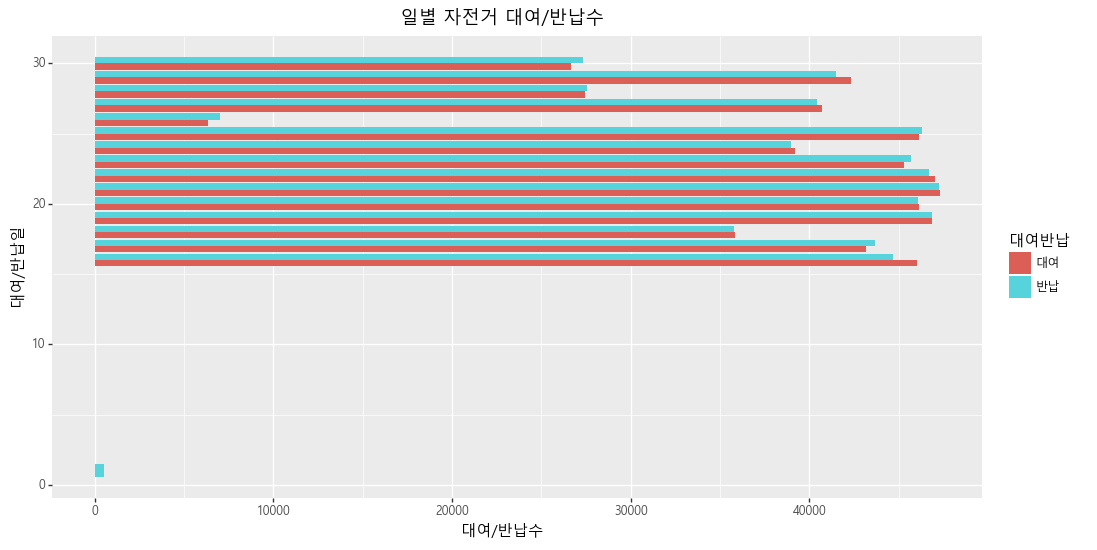

<ggplot: (119704084815)>

In [64]:
(ggplot(df_day) 
       + aes(x='day', y='count', fill='대여반납') 
       + geom_bar(stat='identity',position='dodge')
       + coord_flip()
       + theme(text=element_text(family=fontprop),figure_size=(12,6))
       + labs(x='대여/반납일', y='대여/반납수', title='일별 자전거 대여/반납수')
      )

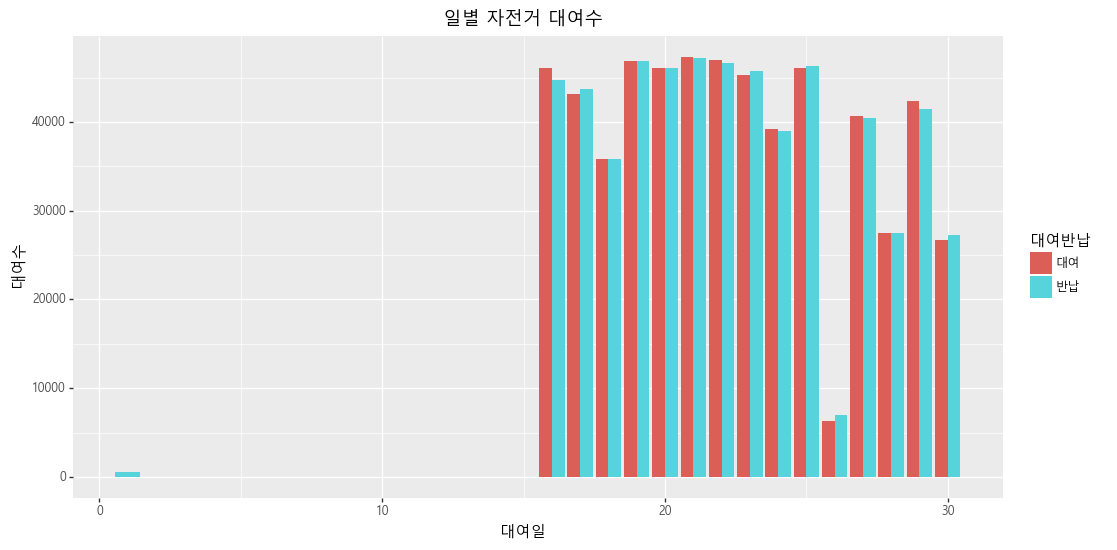

<ggplot: (119704054399)>

In [65]:
(ggplot(df_day)
 + aes(x='day', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + labs(x='대여일', y='대여수', title='일별 자전거 대여수')
 + theme(text=element_text(family=fontprop),
        figure_size=(12,6))
)

* 일부 날짜의 데이터만 있다.
* 2018년 6월 데이터만 봤을 때 26일에는 대여와 반납모두 적다.
* 26일의 일기예보를 보면 장맛비가 내린것을 확인해 볼 수 있다. https://www.youtube.com/watch?v=cYHC8iwfFyU

## 요일별 대여|반납 현황
* 대여|반납별로 어떤 요일에 주로 대여반납이 되는지 시각화해보기 위해 Tidy Data를 만든다.

In [66]:
df_dow_1 = df['대여요일'].value_counts().reset_index()
df_dow_1.columns = ['dayofweek', 'count']
df_dow_1 = df_dow_1.sort_values('dayofweek')
df_dow_1['대여반납'] = '대여'
print(df_dow_1.shape)

df_dow_2 = df['반납요일'].value_counts().reset_index()
df_dow_2.columns = ['dayofweek', 'count']
df_dow_2 = df_dow_2.sort_values('dayofweek')
df_dow_2['대여반납'] = '반납'
print(df_dow_2.shape)

df_dow = pd.concat([df_dow_1, df_dow_2])
print(df_dow.shape)
df_dow

(7, 3)
(7, 3)
(14, 3)


,dayofweek,count,대여반납
4,0,81933,대여
6,1,53151,대여
2,2,86805,대여
5,3,74772,대여
1,4,89337,대여
0,5,117981,대여
3,6,82325,대여
4,0,82058,반납
6,1,53907,반납
2,2,86535,반납


In [67]:
df_dow.head(3)

,dayofweek,count,대여반납
4,0,81933,대여
6,1,53151,대여
2,2,86805,대여


In [68]:
df_dow.tail(3)

,dayofweek,count,대여반납
1,4,88168,반납
0,5,117695,반납
3,6,83169,반납


In [69]:
weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}
df_dow['label'] = df_dow['dayofweek'].replace(weekday_map)

In [70]:
df_dow.tail()

,dayofweek,count,대여반납,label
2,2,86535,반납,WED
5,3,74772,반납,THU
1,4,88168,반납,FRI
0,5,117695,반납,SAT
3,6,83169,반납,SUN


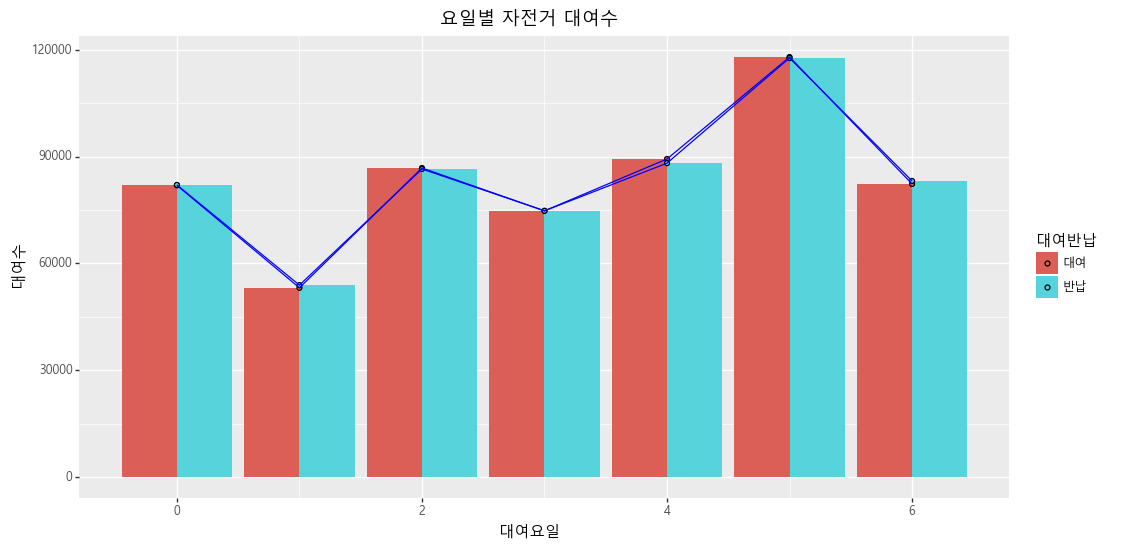

<ggplot: (119704054426)>

In [71]:
(ggplot(df_dow)
 + aes(x='dayofweek', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='대여요일', y='대여수', title='요일별 자전거 대여수')
 + theme(text=element_text(family=fontprop),
        figure_size=(12,6))
)

## 시간대별 대여|반납량

In [72]:
df_hour_1 = df['대여시'].value_counts().reset_index()
df_hour_1.columns = ['hour', 'count']
df_hour_1 = df_hour_1.sort_values('hour')
df_hour_1['대여반납'] = '대여'
df_hour_1.head()

df_hour_2 = df['반납시'].value_counts().reset_index()
df_hour_2.columns = ['hour', 'count']
df_hour_2 = df_hour_2.sort_values('hour')
df_hour_2['대여반납'] = '반납'
df_hour_2.head()

df_hour = pd.concat([df_hour_1, df_hour_2])
df_hour.head()

,hour,count,대여반납
13,0,19837,대여
17,1,15358,대여
19,2,12255,대여
21,3,7462,대여
23,4,4392,대여


In [73]:
df_hour.tail()

,hour,count,대여반납
1,19,46836,반납
2,20,45713,반납
3,21,45628,반납
4,22,44417,반납
5,23,34927,반납


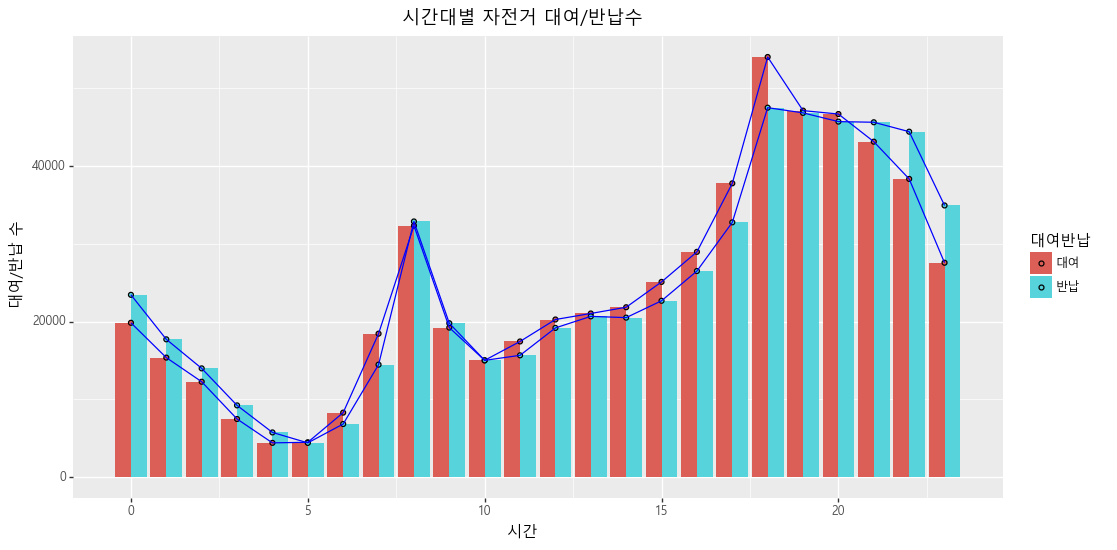

<ggplot: (119703849692)>

In [74]:
(ggplot(df_hour)
 + aes(x='hour', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='시간', y='대여/반납 수', title='시간대별 자전거 대여/반납수')
 + theme(text=element_text(family=fontprop),
        figure_size=(12,6))
)

* 새벽시간대로 갈 수록 대여/반납 수가 줄어든다.
* 출근시간대에는 대여가 반납보다 많다.
* 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
* 오전 11시부터 20시까지는 대여가 반납보다 많다.(대여>반납)
* 21시 이후부터 오전 4시까지는 대여보다 반납이 많다.(대여<반납)

In [75]:
df_minute_1 = df['대여분'].value_counts().reset_index()
df_minute_1.columns = ['minute', 'count']
df_minute_1 = df_minute_1.sort_values('minute')
df_minute_1['대여반납'] = '대여'
print(df_minute_1.shape)

df_minute_2 = df['반납분'].value_counts().reset_index()
df_minute_2.columns = ['minute', 'count']
df_minute_2 = df_minute_2.sort_values('minute')
df_minute_2['대여반납'] = '반납'
print(df_minute_2.shape)

df_minute = pd.concat([df_minute_1, df_minute_2])
print(df_minute.shape)

(60, 3)
(60, 3)
(120, 3)


In [76]:
df_minute.head()

,minute,count,대여반납
57,0,9326,대여
41,1,9601,대여
24,2,9758,대여
28,3,9748,대여
11,4,10037,대여


In [77]:
df_minute.tail()

,minute,count,대여반납
3,55,10369,반납
10,56,10095,반납
11,57,10094,반납
19,58,9882,반납
18,59,9887,반납


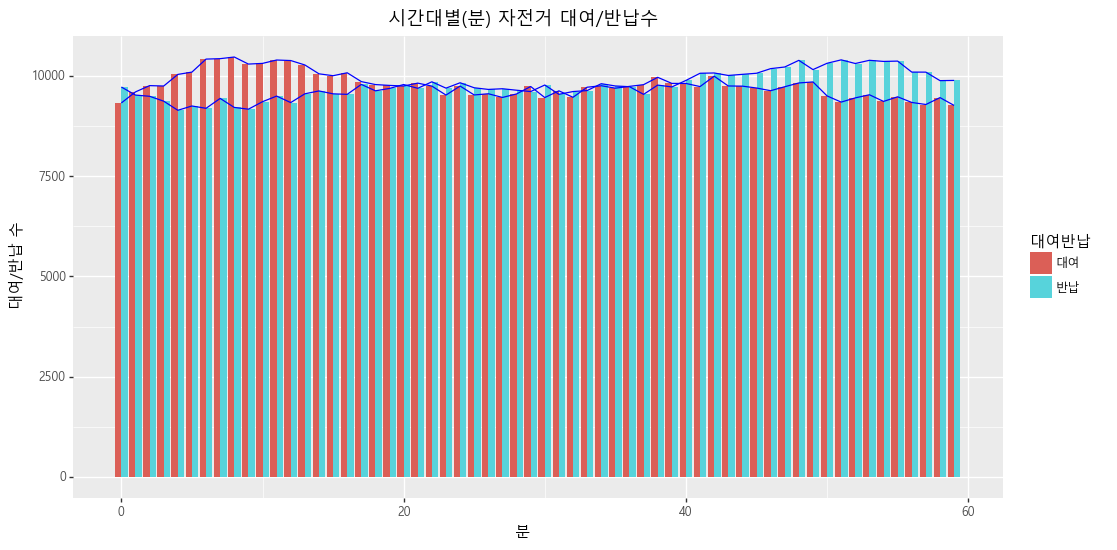

<ggplot: (119703829520)>

In [78]:
(ggplot(df_minute)
 + aes(x='minute', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_line(color='blue')
 + labs(x='분', y='대여/반납 수', title='시간대별(분) 자전거 대여/반납수')
 + theme(text=element_text(family=fontprop),
        figure_size=(12,6))
)

* 대여/반납이 거의 비슷하게 이루어지고 있지만 대여는 0~20분 사이에 더 많이 일어나며 반납은 40~60분 사이에 더 많이 일어난다.

## 대여와 반납은 같은 곳에서 이루어지고 있을까?

In [79]:
# 같은대여반납소라는 컬럼을 새로 만들고 대여반납이 같은 곳에서 이루어지고 있는지 여부를 추가한다.
df['같은대여반납소'] = df['대여대여소명'] == df['반납대여소명']

In [80]:
df_location_diff = df['같은대여반납소'].value_counts().reset_index()
df_location_diff.columns = ['일치여부', '대여반납수']
# 같은|다른 반납소별로 대여반납수가 몇 배나 차이가 나는지 확인한다.
location_diff_ratio = df_location_diff['대여반납수'][0]/df_location_diff['대여반납수'][1]
print(location_diff_ratio)
print('같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {0:.2f}배 많다.'.format(location_diff_ratio))
df_location_diff

7.856020784242644
같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 7.86배 많다.


,일치여부,대여반납수
0,False,520100
1,True,66204


In [81]:
df_location_diff['대여반납수']

0    520100
1     66204
Name: 대여반납수, dtype: int64

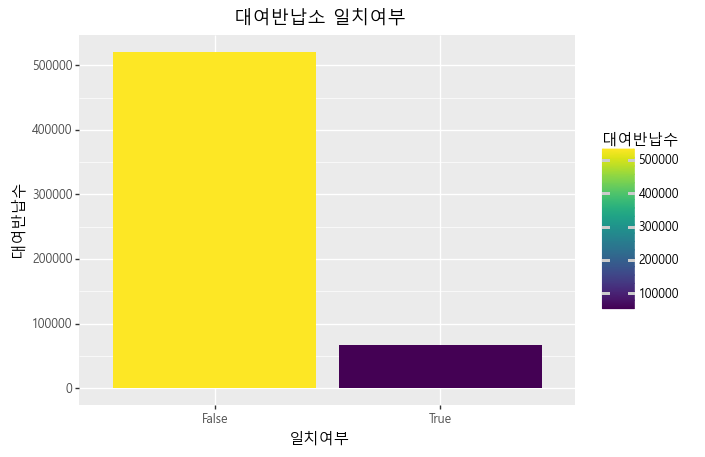

<ggplot: (119703489241)>

In [82]:
# 대여반납수로 fill을 넣어주어 그래프에 색상표현이 되도록 한다.
(ggplot(df_location_diff)
 + geom_col(mapping=aes(x='일치여부', y='대여반납수', fill='대여반납수'))
 + labs(title='대여반납소 일치여부')
 + theme(text=element_text(family=fontprop))
)

같은 곳에서 대여반납을 하는 것보다 다른 곳으로의 대여반납이 훨씬 많은 것을 확인할 수 있다.

In [83]:
df_same_loc = df.loc[df['같은대여반납소'] == True]
df_same_loc.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
27,SPB-09000,2018-06-16 00:01:22,2025,흑석역 1번출구,13,2018-06-16 01:10:42,2025,흑석역 1번출구,9,67,...,0,1,5,2018,6,16,1,10,5,True
34,SPB-08794,2018-06-16 00:01:32,2025,흑석역 1번출구,10,2018-06-16 01:10:42,2025,흑석역 1번출구,15,64,...,0,1,5,2018,6,16,1,10,5,True
40,SPB-02178,2018-06-16 00:01:47,1308,안암로터리 버스정류장 앞,3,2018-06-16 01:52:14,1308,안암로터리 버스정류장 앞,4,110,...,0,1,5,2018,6,16,1,52,5,True
42,SPB-06487,2018-06-16 00:01:50,421,마포구청 앞,6,2018-06-16 00:04:24,421,마포구청 앞,7,2,...,0,1,5,2018,6,16,0,4,5,True
47,SPB-09293,2018-06-16 00:01:56,235,신길동 우리은행 옆,5,2018-06-16 00:05:02,235,신길동 우리은행 옆,5,3,...,0,1,5,2018,6,16,0,5,5,True


In [84]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)
df_same_loc['대여대여소명'].value_counts().head(30)

 여의나루역 1번출구 앞               1046
 뚝섬유원지역 1번출구 앞               900
 서울숲 관리사무소                   665
 봉림교 교통섬                     543
 마포구민체육센터 앞                  541
 고속터미널역 8-1번, 8-2번 출구 사이     485
 옥수역 3번출구                    457
 몽촌토성역 1번출구 옆                390
 노들역 1번출구                    372
 당산육갑문                       336
 양천향교역 7번출구앞                 326
 월드컵공원                       321
 CJ 드림시티                     311
 홍대입구역 2번출구 앞                302
 청계천 생태교실 앞                  292
 마포구청 앞                      288
 홍은사거리                       288
 황금내근린공원                     280
 잠실새내역 5번 출구 뒤               279
 흑석역 1번출구                    274
 보문2교                        266
 외국어대 정문 앞                   262
 한신16차아파트 119동 앞             260
 새절역 2번출구                    252
 현대고등학교 건너편                  246
 서울숲역 4번 출구 옆                214
 도림천 신화교                     212
 도봉구청 옆(중랑천변)                211
 독산보도육교 앞 자전거 보관소            210
 안암로터리 버스정류장 앞               204
Name: 대여대여

* 같은 곳에서 대여반납이 이루어지는 대여소들은 한강주변이나 공원 주변에 위치한 것을 확인해 볼 수 있다.

## 같은|다른 대여소에서 대여가 되는 자전거의 평균 이용시간
### 같은 대여반납소

In [85]:
same_loc_mean_time = df_same_loc['이용시간(분)'].mean()
print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', same_loc_mean_time)
df_same_mean = df_same_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_same_mean.head()

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  53.18429400036251


,대여대여소명,반납대여소명,이용시간(분)
0,강동구청 앞,강동구청 앞,57.882353
1,둔촌역 3번 출입구,둔촌역 3번 출입구,46.810127
2,(구)신한은행 중랑교지점,(구)신한은행 중랑교지점,47.545455
3,(구)합정동 주민센터,(구)합정동 주민센터,62.639344
4,3호선 매봉역 3번출구앞,3호선 매봉역 3번출구앞,48.227273


In [86]:
df_same_count = df_same_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_same_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_same_count.head()

,대여대여소명,반납대여소명,이용횟수
0,강동구청 앞,강동구청 앞,34
1,둔촌역 3번 출입구,둔촌역 3번 출입구,79
2,(구)신한은행 중랑교지점,(구)신한은행 중랑교지점,44
3,(구)합정동 주민센터,(구)합정동 주민센터,61
4,3호선 매봉역 3번출구앞,3호선 매봉역 3번출구앞,66


In [87]:
df_same_loc2 = df_same_mean.merge(df_same_count, left_on=['대여대여소명', '반납대여소명'],\
                                  right_on=['대여대여소명', '반납대여소명'])
df_same_loc2.head()

,대여대여소명,반납대여소명,이용시간(분),이용횟수
0,강동구청 앞,강동구청 앞,57.882353,34
1,둔촌역 3번 출입구,둔촌역 3번 출입구,46.810127,79
2,(구)신한은행 중랑교지점,(구)신한은행 중랑교지점,47.545455,44
3,(구)합정동 주민센터,(구)합정동 주민센터,62.639344,61
4,3호선 매봉역 3번출구앞,3호선 매봉역 3번출구앞,48.227273,66


In [88]:
df_same_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
167,구로1동우체국 앞,구로1동우체국 앞,143.500000,2
278,달맞이공원,달맞이공원,122.066667,15
434,명지대학교 학생회관,명지대학교 학생회관,121.285714,7
856,역삼동 sk뷰 501동앞,역삼동 sk뷰 501동앞,114.000000,1
66,강남세브란스교차로 래미안그레이튼 104동 앞,강남세브란스교차로 래미안그레이튼 104동 앞,99.727273,11
131,공항시장역 4번출구,공항시장역 4번출구,95.545455,11
833,양원역 2번출구,양원역 2번출구,94.333333,3
618,서대문구청,서대문구청,92.023810,42
221,금호역 1번출구 앞,금호역 1번출구 앞,91.777778,9
235,낙성대역 1번출구,낙성대역 1번출구,89.562500,16


In [89]:
# 이용횟수가 많은 곳의 평균 이용시간
df_same_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
850,여의나루역 1번출구 앞,여의나루역 1번출구 앞,66.167304,1046
369,뚝섬유원지역 1번출구 앞,뚝섬유원지역 1번출구 앞,56.593333,900
646,서울숲 관리사무소,서울숲 관리사무소,57.178947,665
518,봉림교 교통섬,봉림교 교통섬,58.836096,543
404,마포구민체육센터 앞,마포구민체육센터 앞,57.975970,541
118,"고속터미널역 8-1번, 8-2번 출구 사이","고속터미널역 8-1번, 8-2번 출구 사이",72.138144,485
905,옥수역 3번출구,옥수역 3번출구,55.855580,457
445,몽촌토성역 1번출구 옆,몽촌토성역 1번출구 옆,58.420513,390
253,노들역 1번출구,노들역 1번출구,63.424731,372
287,당산육갑문,당산육갑문,66.157738,336


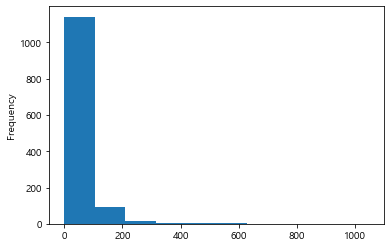

In [90]:
df_same_loc2['이용횟수'].plot.hist()

### 다른 대여|반납소

In [91]:
df_diff_loc = df.loc[df['같은대여반납소'] == False]
df_diff_loc.shape

(520100, 24)

In [92]:
diff_loc_mean_time = df_diff_loc['이용시간(분)'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', df_diff_loc['이용시간(분)'].mean())
df_diff_mean = df_diff_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_diff_count = df_diff_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_diff_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_diff_loc2 = df_diff_mean.merge(df_diff_count, left_on=['대여대여소명', '반납대여소명'], right_on=['대여대여소명', '반납대여소명'])
df_diff_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  25.834228033070563


,대여대여소명,반납대여소명,이용시간(분),이용횟수
94100,천왕역 4번출구 뒤,신정3동 현장민원실 앞,740.000000,1
72879,여의도고교 앞,보라매역 8번출구,651.000000,1
59814,성수역3번출구,논현역 7번출구,553.000000,1
70466,압구정파출소 앞,전농사거리 교통섬,506.000000,1
66230,신설동역8번출구,청계천 박물관 앞,504.000000,3
41979,방화역 4번출구앞,황금내근린공원,479.000000,1
1077,DMC역 2번출구 옆,홍은동 정원여중 입구,440.000000,2
84463,이태원지하보도,마포구청역,437.000000,2
84329,이태원관광특구입구,국립현대미술관,405.666667,3
15423,구로역 광장,유한양행앞,405.000000,1


In [93]:
df_diff_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
99349,하늘채코오롱아파트 건너편,홍대입구역 2번출구 앞,10.240938,469
104360,홍대입구역 2번출구 앞,하늘채코오롱아파트 건너편,14.943734,391
86527,장승배기역 5번출구,노량진역 5번출구,8.200000,285
43695,봉림교 교통섬,도림천 신화교,17.679856,278
26686,도림천 신화교,봉림교 교통섬,14.248175,274
108597,청계산입구역 1번출구,언남초등학교 앞,8.184426,244
43745,봉림교 교통섬,서울신성초등학교,21.479339,242
72270,언남초등학교 앞,청계산입구역 1번출구,6.260504,238
7959,건국대학교 (입학정보관),건국대학교 학생회관,12.218341,229
85076,자양나들목,뚝섬유원지역 1번출구 앞,8.204651,215


In [94]:
rent_mean_time = same_loc_mean_time - diff_loc_mean_time
print('같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 {:,.2f} 분 많다.'.format(rent_mean_time))

같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 27.35 분 많다.


* 이용횟수가 많은 대여소라고 해서 평균이용시간이 평균보다 높지는 않다.
* 하늘채코오롱아파트 건너편<->홍대입구역 2번출구 앞은 이용횟수가 가장 높은 대여반납소다.
* 관련기사
    * ['따릉이' 타고 가장 많이 다닌 경로는? - 통플러스](http://news.tongplus.com/site/data/html_dir/2018/10/24/2018102402585.html)
    * [[ONE SHOT] 따릉이, ‘이곳’서 가장 많이 빌리고 ‘여기’서 가장 많이 탄다](https://news.joins.com/article/23003297)

## 해당 기간동안 가장 많이 이용된 자전거는 몇 회 대여 되었을까?

In [95]:
df.info()
df['자전거번호'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   자전거번호    586304 non-null  object        
 1   대여일시     586304 non-null  datetime64[ns]
 2   대여대여소번호  586304 non-null  object        
 3   대여대여소명   586304 non-null  object        
 4   대여거치대    586304 non-null  int64         
 5   반납일시     586304 non-null  datetime64[ns]
 6   반납대여소번호  586304 non-null  object        
 7   반납대여소명   586304 non-null  object        
 8   반납거치대    586304 non-null  int64         
 9   이용시간(분)  586304 non-null  int64         
 10  이용거리(M)  586304 non-null  int64         
 11  대여년      586304 non-null  int64         
 12  대여월      586304 non-null  int64         
 13  대여일      586304 non-null  int64         
 14  대여시      586304 non-null  int64         
 15  대여분      586304 non-null  int64         
 16  대여요일     586304 non-null  int64         
 17  반납년      5

count        586304
unique        12970
top       SPB-18238
freq            139
Name: 자전거번호, dtype: object

In [96]:
bike_describe = df['자전거번호'].describe()
print('대여된 자전거 수 :', bike_describe[1]) #unique
print('가장 많이 대여된 자전거 번호 :', bike_describe[2]) #top
print('가장 많이 대여된 자전거의 대여횟수 :', bike_describe[3]) #freq
bike_describe

대여된 자전거 수 : 12970
가장 많이 대여된 자전거 번호 : SPB-18238
가장 많이 대여된 자전거의 대여횟수 : 139


count        586304
unique        12970
top       SPB-18238
freq            139
Name: 자전거번호, dtype: object

In [97]:
bike_rent_counts = df['자전거번호'].value_counts().reset_index()
bike_rent_counts.columns = ['자전거번호', '대여수']
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['대여수'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['대여수'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['대여수'].min())
bike_rent_counts.head()

해당 기간동안 자전거 하나당 평균 대여 수: 45.20462606013878
자전거 하나당 가장 많이 대여된 횟수: 139
자전거 하나당 가장 적게 대여된 횟수: 1


,자전거번호,대여수
0,SPB-18238,139
1,SPB-14689,128
2,SPB-16288,126
3,SPB-16176,125
4,SPB-18073,121


In [98]:
bike_rent_counts.tail()

,자전거번호,대여수
12965,SPB-06897,1
12966,SPB-14435,1
12967,SPB-15775,1
12968,SPB-12617,1
12969,SPB-14818,1


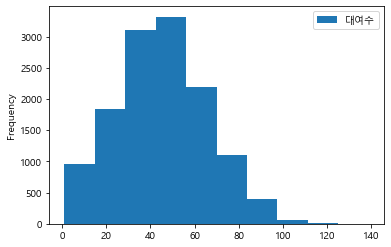

In [99]:
bike_rent_counts.plot.hist()

In [100]:
# 가장 많이 대여된 자전거의 대여이력
most_bike_df = df.loc[df['자전거번호'] == bike_describe[2]]
most_bike_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
13282,SPB-18238,2018-06-16 13:01:05,2140,신림1교 교차로,6,2018-06-16 13:46:40,1975,대림역 1번 출입구 밑,4,45,...,13,1,5,2018,6,16,13,46,5,False
14861,SPB-18238,2018-06-16 13:47:21,1975,대림역 1번 출입구 밑,4,2018-06-16 14:17:53,2140,신림1교 교차로,6,30,...,13,47,5,2018,6,16,14,17,5,False
18639,SPB-18238,2018-06-16 15:25:52,2140,신림1교 교차로,6,2018-06-16 16:16:09,2140,신림1교 교차로,2,49,...,15,25,5,2018,6,16,16,16,5,True
22887,SPB-18238,2018-06-16 17:01:22,2140,신림1교 교차로,2,2018-06-16 18:39:24,2140,신림1교 교차로,1,97,...,17,1,5,2018,6,16,18,39,5,True
28700,SPB-18238,2018-06-16 18:43:39,2140,신림1교 교차로,1,2018-06-16 19:21:39,2171,서울대입구역 5번출구,12,37,...,18,43,5,2018,6,16,19,21,5,False


* 같은 자전거가 동일 시간대에 여러번 대여된 이력을 확인 할 수 있다. 좀 더 확인이 필요하다.

In [101]:
most_bike_df['대여대여소번호'].value_counts().head()

1122    57
623      4
2140     4
2139     3
179      2
Name: 대여대여소번호, dtype: int64

In [102]:
most_bike_df[most_bike_df['대여대여소번호'] == '1122']['대여일시'].value_counts()

2018-06-18 18:58:02    22
2018-06-18 18:49:46    18
2018-06-18 18:55:24    15
2018-06-18 19:03:29     1
2018-06-18 17:58:03     1
Name: 대여일시, dtype: int64

In [103]:
most_bike_df[most_bike_df['대여대여소번호'] == '1122']['반납일시'].value_counts()

2018-06-18 18:59:27    3
2018-06-18 18:59:36    3
2018-06-18 18:55:45    3
2018-06-18 18:55:58    3
2018-06-18 18:56:12    3
2018-06-18 18:56:24    3
2018-06-18 18:58:21    3
2018-06-18 18:58:36    3
2018-06-18 18:59:07    3
2018-06-18 18:53:48    3
2018-06-18 18:55:32    3
2018-06-18 19:00:01    3
2018-06-18 18:52:28    3
2018-06-18 18:52:53    3
2018-06-18 18:53:01    3
2018-06-18 18:51:10    2
2018-06-18 18:58:52    2
2018-06-18 18:53:29    2
2018-06-18 18:58:11    1
2018-06-18 18:58:51    1
2018-06-18 18:51:09    1
2018-06-18 18:49:05    1
2018-06-18 18:53:28    1
2018-06-18 20:09:26    1
Name: 반납일시, dtype: int64

In [104]:
most_bike_df['대여대여소명'].value_counts()

 황금내근린공원        57
 신림1교 교차로        4
 서울시립대 정문 앞      4
 서울신성초등학교        3
 서울대입구역 5번출구     2
                ..
 종로구청 옆          1
 돈암성당 옆          1
 마포역 1번출구 뒤      1
 충정로역 7번출구 뒤     1
 군자지하보도 앞        1
Name: 대여대여소명, Length: 67, dtype: int64

In [105]:
rent_station = most_bike_df['대여대여소명'].unique()
rent_station

array([' 신림1교 교차로', ' 대림역 1번 출입구 밑', ' 서울대입구역 5번출구', ' 봉림교 교통섬',
       ' 서울신성초등학교', ' 구로디지털단지역 앞', ' 대림역4번출구', ' 삼부르네상스파크빌', ' 가산동 주민센터',
       ' 가리봉동주민센터', ' 신림역 5번출구', ' 신림동걷고싶은문화의거리입구', ' 대방역6번출구', ' 산업은행 앞',
       ' IFC몰', ' 황금내근린공원', ' 서빙고동 주민센터 앞', ' 북가좌1동 주민센터 ', ' 가좌역 4번출구 앞',
       ' 상명대입구', ' 청와대앞길', ' 종로구청 옆', ' 삼각산동 주민센터', ' 정릉현대힐스테이트 1차 후문',
       ' 돈암초교 입구', ' 동성중학교 앞', ' 돈암성당 옆', ' 맥스타일 앞', ' 포르투갈 대사관 앞',
       ' 종로3가역 2번출구 뒤', ' 청계8가 사거리', ' 안암로터리 버스정류장 앞', ' 서울시립대 정문 앞',
       ' 청량리 기업은행 앞', ' 용답역 1번 출구', ' 옥수역 3번출구', ' 청계천 생태교실 앞', ' 베르가모앞',
       ' 합정역 7번출구 앞', ' (구)합정동 주민센터', ' 마포구민체육센터 앞', ' 사루비아 빌딩 앞',
       ' KB국민은행 염창역 지점 앞', ' 마포역 1번출구 뒤', ' 신촌역(2호선) 7번출구 앞',
       ' 광흥창역 2번출구 앞', ' 서강대 정문 건너편', ' 북성초교', ' 충정로역 7번출구 뒤',
       ' 종각역 5번출구', ' 세운스퀘어 앞', ' 동대문역 8번 출구', ' 신설동역 10번출구 앞',
       ' 도선동 주민센터 앞', ' 신설동역8번출구', ' 영동대교 북단', ' 성수역3번출구',
       ' 성수2가1동 공영주차장 인근', ' 광진광장 교통섬', ' 광진메디칼 앞', ' 어린이대공원역6번출구',
       ' 동원사거리', ' 세종사이버대학교', ' 군자역 7번출구뒤', 

In [106]:
# 대여소명 앞에 들어간 공백을 제거합니다.
bike_move = []
for s in rent_station:
    bike_move.append(s.strip())
    
bike_move    

['신림1교 교차로',
 '대림역 1번 출입구 밑',
 '서울대입구역 5번출구',
 '봉림교 교통섬',
 '서울신성초등학교',
 '구로디지털단지역 앞',
 '대림역4번출구',
 '삼부르네상스파크빌',
 '가산동 주민센터',
 '가리봉동주민센터',
 '신림역 5번출구',
 '신림동걷고싶은문화의거리입구',
 '대방역6번출구',
 '산업은행 앞',
 'IFC몰',
 '황금내근린공원',
 '서빙고동 주민센터 앞',
 '북가좌1동 주민센터',
 '가좌역 4번출구 앞',
 '상명대입구',
 '청와대앞길',
 '종로구청 옆',
 '삼각산동 주민센터',
 '정릉현대힐스테이트 1차 후문',
 '돈암초교 입구',
 '동성중학교 앞',
 '돈암성당 옆',
 '맥스타일 앞',
 '포르투갈 대사관 앞',
 '종로3가역 2번출구 뒤',
 '청계8가 사거리',
 '안암로터리 버스정류장 앞',
 '서울시립대 정문 앞',
 '청량리 기업은행 앞',
 '용답역 1번 출구',
 '옥수역 3번출구',
 '청계천 생태교실 앞',
 '베르가모앞',
 '합정역 7번출구 앞',
 '(구)합정동 주민센터',
 '마포구민체육센터 앞',
 '사루비아 빌딩 앞',
 'KB국민은행 염창역 지점 앞',
 '마포역 1번출구 뒤',
 '신촌역(2호선) 7번출구 앞',
 '광흥창역 2번출구 앞',
 '서강대 정문 건너편',
 '북성초교',
 '충정로역 7번출구 뒤',
 '종각역 5번출구',
 '세운스퀘어 앞',
 '동대문역 8번 출구',
 '신설동역 10번출구 앞',
 '도선동 주민센터 앞',
 '신설동역8번출구',
 '영동대교 북단',
 '성수역3번출구',
 '성수2가1동 공영주차장 인근',
 '광진광장 교통섬',
 '광진메디칼 앞',
 '어린이대공원역6번출구',
 '동원사거리',
 '세종사이버대학교',
 '군자역 7번출구뒤',
 '군자지하보도 앞',
 '성수아카데미타워 앞',
 '홈플러스 면목동점']

In [107]:
stations = pd.read_csv('data/bike_rent_station.csv')
print(stations.shape)
stations.head()

(1463, 5)


,대여소,상태,주소,위도,경도
0,광진교 남단 사거리(디지털프라자앞),운영중,서울특별시 강동구 구천면로 171 376 남단사거리,37.541805,127.124718
1,해공공원(천호동),운영중,서울특별시 강동구 올림픽로 702 265,37.545219,127.125916
2,해공도서관앞,운영중,서울특별시 강동구 올림픽로 702 367,37.543915,127.125458
3,삼성광나루아파트 버스정류장,운영중,서울특별시 강동구 상암로3길 77 암사동 534,37.553349,127.128860
4,롯데캐슬 115동앞,운영중,서울특별시 강동구 양재대로 1665 명일동 304,37.554920,127.142799


In [108]:
bike_move_df = pd.DataFrame(bike_move)
bike_move_df.columns = ['대여소']
print(bike_move_df.shape)
bike_move_df.head()

(67, 1)


,대여소
0,신림1교 교차로
1,대림역 1번 출입구 밑
2,서울대입구역 5번출구
3,봉림교 교통섬
4,서울신성초등학교


In [109]:
bike_move_df = bike_move_df.merge(stations, left_on='대여소', right_on='대여소', how='left')
bike_move_df.shape

(67, 5)

In [110]:
bike_move_df.head()

,대여소,상태,주소,위도,경도
0,신림1교 교차로,운영중,서울특별시 관악구 신림로 270 관악구 신림동 808-263,37.478428,126.931862
1,대림역 1번 출입구 밑,운영중,서울특별시 구로구 도림천로 351 대림역 1번 출입구 밑,37.492580,126.894737
2,서울대입구역 5번출구,운영중,서울특별시 관악구 남부순환로 1817 서울대입구역 5번출구,37.481548,126.952003
3,봉림교 교통섬,운영중,서울특별시 관악구 관천로 52 관악구 신림동 1433-150,37.484230,126.926392
4,서울신성초등학교,운영중,서울특별시 관악구 신림로 114 서울신성초등학교,37.471165,126.937019


In [111]:
bike_move_df.isnull().sum()

대여소    0
상태     2
주소     2
위도     2
경도     2
dtype: int64

## 가장 많이 대여된 자전거가 거쳐간 대여소

In [112]:
# 정보가 없는 대여소
bike_move_df.loc[bike_move_df['경도'].isnull()]

,대여소,상태,주소,위도,경도
23,정릉현대힐스테이트 1차 후문,NaN,NaN,NaN,NaN
63,군자역 7번출구뒤,NaN,NaN,NaN,NaN


In [113]:
# 지도 표현을 위해 folium 을 import 한다.
# 데이터 프레임에서 위도와 경도의 평균값을 구한다. 이 값으로 지도의 중심이 될 좌표를 정한다.
# zoom_start는 지도를 얼마나 확대해서 볼것인지다.
# tiles는 지도의 스타일이다.
import folium 

geo_df = bike_move_df
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    if geo_df.loc[n, '위도'] > 0 and geo_df.loc[n, '경도'] > 0 :
        loc_name = geo_df.loc[n, '대여소']

        icon_color = 'red'
        folium.Circle(
            location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
            popup=loc_name,
            radius=50,
            color=icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)
    
map